In [2]:
%matplotlib inline

In [55]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [67]:
mpl.rcParams['figure.figsize'] = (14, 6)

# Trivial case

In [68]:
t = np.arange(1024)
f_0 = .01
x_t = np.sin(2 * np.pi * f_0 * t)

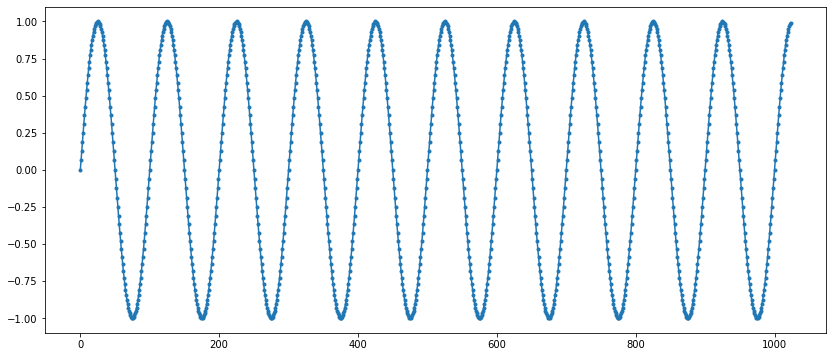

In [69]:
plt.plot(t, x_t, marker='.')

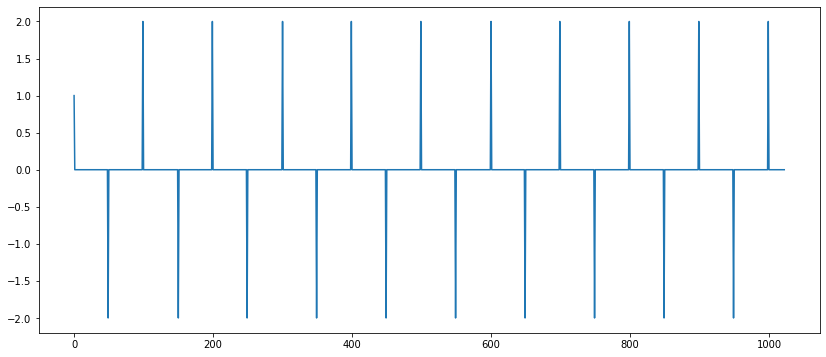

In [70]:
y_t = np.sign(x_t)
y_t = np.diff(y_t)

plt.plot(t[:-1], y_t)

In [71]:
t_intersection = t[:-1][y_t != 0]

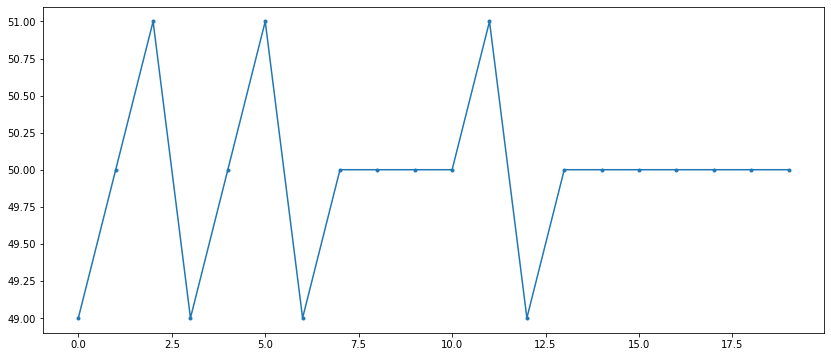

In [76]:
p = np.diff(t_intersection)

plt.plot(p, marker='.')

In [77]:
f_e = 1. / p.mean() / 2  # harmonic intersects axis two times per cycle

In [78]:
f_e, f_0 - f_e

(0.01001001001001001, -1.0010010010009715e-05)

# Noise

In [79]:
x_t = np.sin(2 * np.pi * f_0 * t)  + np.random.normal(scale=.2, size=t.shape)

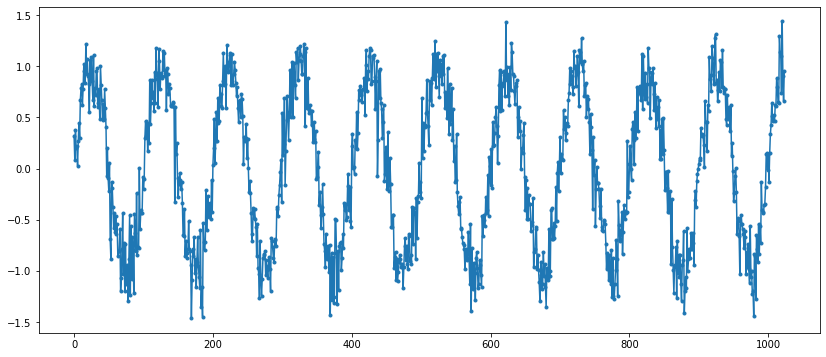

In [80]:
plt.plot(t, x_t, marker='.')

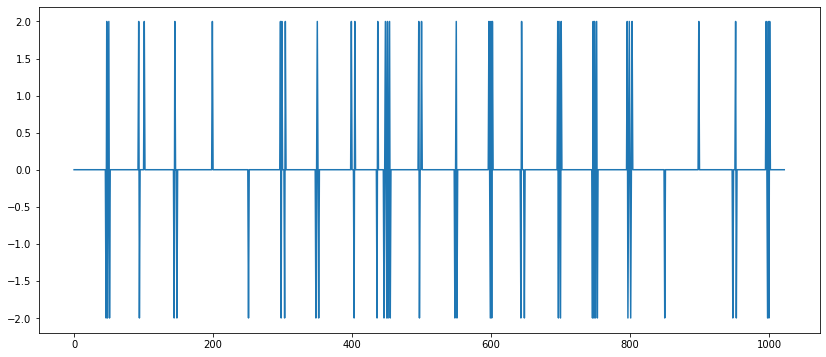

In [83]:
y_t = np.sign(x_t)
y_t = np.diff(y_t)

plt.plot(t[:-1], y_t)

In [86]:
t_intersection = t[:-1][y_t != 0]

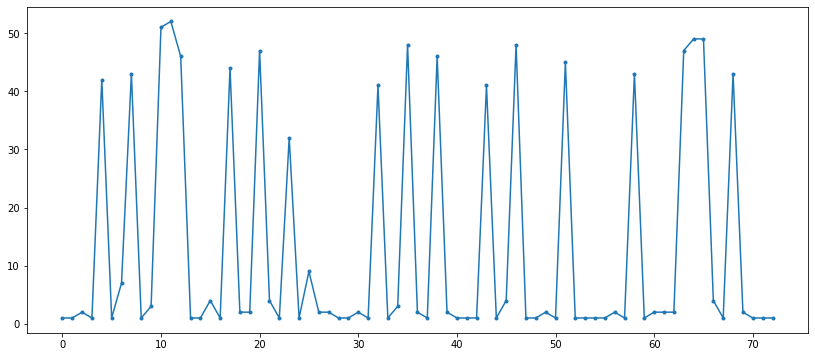

In [87]:
p = np.diff(t_intersection)

plt.plot(p, marker='.')

In [88]:
f_e = 1. / p.mean() / 2  # harmonic intersects axis two times per cycle

In [90]:
f_e, f_0 - f_e  # absolytely wrong result!

(0.03821989528795812, -0.028219895287958117)

In [92]:
from scipy.signal import savgol_filter

x_filt = savgol_filter(x_t, 31, 3)

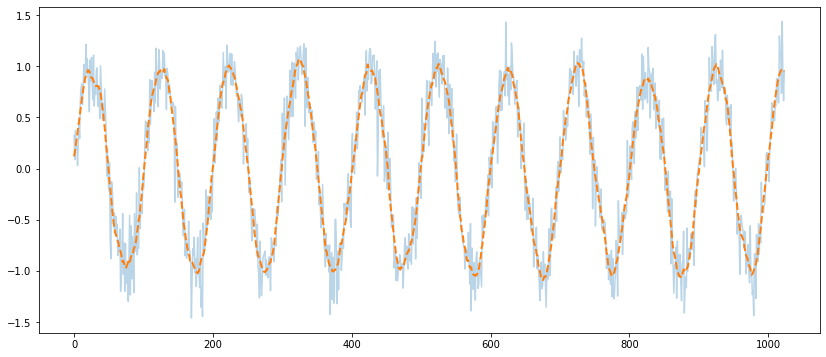

In [97]:
plt.plot(t, x_t, alpha=.3)
plt.plot(t, x_filt, linestyle='--', linewidth=2)

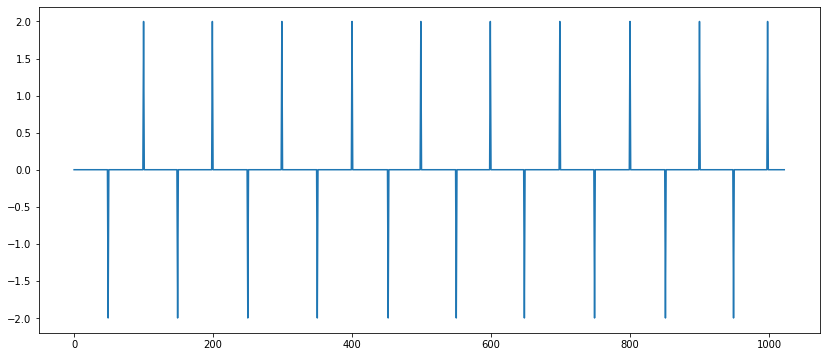

In [98]:
y_t = np.sign(x_filt)
y_t = np.diff(y_t)

plt.plot(t[:-1], y_t)

In [99]:
t_intersection = t[:-1][y_t != 0]

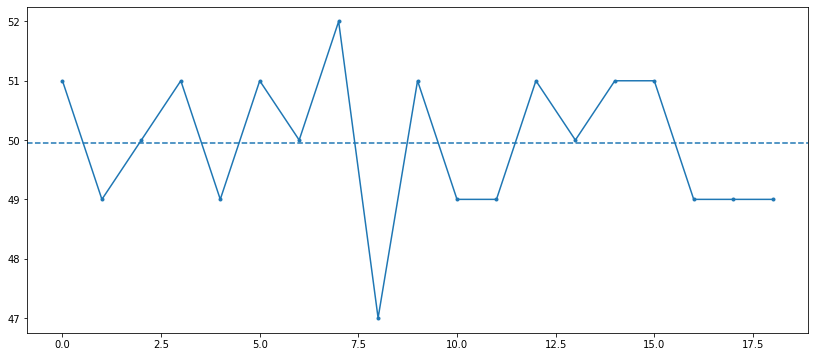

In [102]:
p = np.diff(t_intersection)

plt.plot(p, marker='.')
plt.axhline(p.mean(), linestyle='--')

In [101]:
f_e = 1. / p.mean() / 2  # harmonic intersects axis two times per cycle

f_e, f_0 - f_e

(0.010010537407797683, -1.0537407797682474e-05)